## Data Analysis with pandas

Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.

Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

- Do people in Suburban areas eat more Tofurkey than people in Rural areas?
- Where do people go to Black Friday sales most often?
- Is there a correlation between praying on Thanksgiving and income?
- What income groups are most likely to have homemade cranberry sauce?

### Task 1 - Load Data

- Read about the [data set](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015)
- Read in the data to pandas
- Check the shape of the dataframe and examine the different columns
- Check the summary statistics of the dataframe

In [1]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tg = pd.read_csv("thanksgiving.csv", encoding='latin-1')
print(tg.shape)
print(tg.columns)
tg.describe(include='all')


(1058, 65)
Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypic

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
count,1.058000e+03,1058,974,35,974,51,974,36,974,25,...,951,951,951,951,70,948,1025,1025,1025,999
unique,NaN,2,8,32,5,34,4,29,4,24,...,2,2,2,2,3,3,4,2,11,9
top,NaN,Yes,Turkey,Prime Rib,Baked,Smoked,Bread-based,cornbread,Canned,Both Canned and Homemade,...,No,No,No,No,Yes,Suburban,45 - 59,Female,"$25,000 to $49,999",South Atlantic
freq,NaN,980,859,2,481,7,836,6,502,2,...,594,683,727,881,43,496,286,544,180,214
mean,4.336731e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.937834e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.335895e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.336339e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.336797e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.337012e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Task 2 - Initial Data Analysis

- Create a new dataframe that only includes people that celebrate Thanksgiving
- Find out what the most popular main dish is.
- Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
- What is the most popular pie?
- How many pies are eaten other than Apple, Pecan and Pumpkin?
- Look at the age distribution.
- Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the age column now.
- Look at the income distribution.
- Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the income column now.
- Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
- Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.


In [2]:
#Create a new dataframe that only includes people that celebrate Thanksgiving
tg_cele = tg.loc[tg['Do you celebrate Thanksgiving?']=='Yes']
tg_cele.shape

(980, 65)

In [3]:
#Find out what the most popular main dish is.
pop_dish = tg_cele["What is typically the main dish at your Thanksgiving dinner?"].value_counts()
print(pop_dish)
print("The most popular main dish is turkey.")

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64
The most popular main dish is turkey.


In [4]:
#Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
tofu_gravy = pd.crosstab(index=tg_cele["What is typically the main dish at your Thanksgiving dinner?"], 
                         columns=tg_cele['Do you typically have gravy?'], margins=True)
tofu_gravy_per = tofu_gravy.T/tofu_gravy["All"]
print(tofu_gravy_per["Tofurkey"].iloc[1], "of the people who serve Tofukey for Thanksgiving also serve gravy.")

0.6 of the people who serve Tofukey for Thanksgiving also serve gravy.


In [5]:
#What is the most popular pie?
tg_pie = tg.filter(regex='Which type of pie is typically served at your Thanksgiving dinner?')
col_name_list = list(tg_pie)
pie_ls = []
for col in col_name_list:
    pie_ls.append(tg_pie[col].value_counts())


   
print("Pumpkin pie is the most commonly served pie at Thanksgiving.  Apple is second.")    

Pumpkin pie is the most commonly served pie at Thanksgiving.  Apple is second.


In [6]:
# How many pies are eaten other than Apple, Pecan and Pumpkin?
pie_count = tg_pie.apply(pd.value_counts).fillna(0)
pie_count_noapp = pie_count.drop(["Apple", "Pecan", "Pumpkin"])
pie_total = pie_count_noapp.values.sum()
print(pie_total)
print(pie_count_noapp.shape[0])


724.0
71


In [7]:
# How many pies are eaten other than Apple, Pecan and Pumpkin?
other_pie=tg_pie["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1"].value_counts()


In [15]:
#Look at the age distribution.
#Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).

def age_conv(age_range):
    if age_range == "45 - 59":
        return int(52)
    if age_range == "30 - 44":
        return int(37)
    if age_range == "18 - 29":
        return int(24)
    if age_range == "60+":
        return int(70)

new_age=tg_cele.loc[:,("Age")].apply(age_conv)
tg_cele["Int_Age"]=new_age

del tg_cele["New_Age"]





/Users/ajwright/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
#Examine the summary statistics of the age column now.
age_dist = tg_cele["Int_Age"].value_counts()
print(age_dist)
print(tg_cele["Int_Age"].describe())

52.0    269
70.0    258
37.0    235
24.0    185
Name: Int_Age, dtype: int64
count    947.000000
mean      47.711721
std       16.708301
min       24.000000
25%       37.000000
50%       52.000000
75%       70.000000
max       70.000000
Name: Int_Age, dtype: float64


In [17]:
#Look at the income distribution
#Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).


inc_dist = tg_cele["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts()
print(inc_dist)

#drop rows from the database where people answered 
indexIncome = tg_cele[ tg_cele['How much total combined money did all members of your HOUSEHOLD earn last year?'] == "Prefer not to answer"].index
tg_income = tg_cele.drop(indexIncome)


def income_conv(inc_range):
    if inc_range == "$25,000 to $49,999":
        return int(37500)
    if inc_range == "$50,000 to $74,999":
        return int(62500)
    if inc_range == "$75,000 to $99,999":
        return int(87500)
    if inc_range == "$100,000 to $124,999":
        return int(112500)
    if inc_range == "$200,000 and up":
        return int(300000)
    if inc_range == "$10,000 to $24,999":
        return int(17500)
    if inc_range == "$0 to $9,999":
        return int(5000)
    if inc_range == '$125,000 to $149,999':
        return int(137500)
    if inc_range == "$150,000 to $174,999":
        return int(162500)
    if inc_range == "$175,000 to $199,999":
        return int(187500)

tg_income["Int_Income"]= tg_income["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(income_conv)
    

$25,000 to $49,999      166
$75,000 to $99,999      127
$50,000 to $74,999      127
Prefer not to answer    118
$100,000 to $124,999    109
$200,000 and up          76
$10,000 to $24,999       60
$0 to $9,999             52
$125,000 to $149,999     48
$150,000 to $174,999     38
$175,000 to $199,999     26
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64


In [18]:
#Examine the summary statistics of the income column now.
inc_dist2 = tg_income["Int_Income"].value_counts()
print(inc_dist2)

37500.0     166
87500.0     127
62500.0     127
112500.0    109
300000.0     76
17500.0      60
5000.0       52
137500.0     48
162500.0     38
187500.0     26
Name: Int_Income, dtype: int64


In [32]:
#Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.

low_inc = tg_income.loc[tg_income["Int_Income"]<50000]
high_inc = tg_income.loc[tg_income["Int_Income"]>150000]

print("This is the breakdown of the travel plans for those whose households make greater than $150,000 a year.")
print(high_inc["How far will you travel for Thanksgiving?"].value_counts())
print(" ")

print("This is the breakdown of the travel plans for those whose households make less than $50,000 a year.")
print(low_inc["How far will you travel for Thanksgiving?"].value_counts())


This is the breakdown of the travel plans for those whose households make greater than $150,000 a year.
Thanksgiving is happening at my home--I won't travel at all                         66
Thanksgiving is local--it will take place in the town I live in                     34
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    25
Thanksgiving is out of town and far away--I have to drive several hours or fly      15
Name: How far will you travel for Thanksgiving?, dtype: int64
 
This is the breakdown of the travel plans for those whose households make less than $50,000 a year.
Thanksgiving is happening at my home--I won't travel at all                         106
Thanksgiving is local--it will take place in the town I live in                      92
Thanksgiving is out of town but not too far--it's a drive of a few hours or less     64
Thanksgiving is out of town and far away--I have to drive several hours or fly       16
Name: How far will you travel fo

In [51]:
#Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends".

#'Have you ever tried to meet up with hometown friends on Thanksgiving night?',
#      'Have you ever attended a "Friendsgiving?"',
       
hometown_pt = pd.pivot_table(tg_income, values = ["Int_Age", "Int_Income"], index=["Have you ever tried to meet up with hometown friends on Thanksgiving night?"]) 

Friendsgiving_pt = pd.pivot_table(tg_income, values = ["Int_Age", "Int_Income"], index=['Have you ever attended a "Friendsgiving?"']) 

print(hometown_pt)
print(" ")
print(Friendsgiving_pt)


                                                      Int_Age    Int_Income
Have you ever tried to meet up with hometown fr...                         
No                                                  50.055010  98531.434185
Yes                                                 45.409375  91078.125000
 
                                             Int_Age    Int_Income
Have you ever attended a "Friendsgiving?"                         
No                                         50.635607  99301.164725
Yes                                        42.004386  86041.666667


### Task 3 - Visualization

matplotlib
- Use groupby to examine the breakdown of income by type of cranberry sauce
- Use agg to compute the mean and plot the results in a bar chart
- Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
- Choose an appropriate plot or chart to visualize the results

In [88]:
#Use groupby to examine the breakdown of income by type of cranberry sauce
#grouped_cran = tg_income.groupby(['What type of cranberry saucedo you typically have?'])
#grouped_cran_inc_mean = grouped_cran['What type of cranberry saucedo you typically have?'].Int_Income.mean()


cran_inc = tg_income.groupby('What type of cranberry saucedo you typically have?').Int_Income.mean()

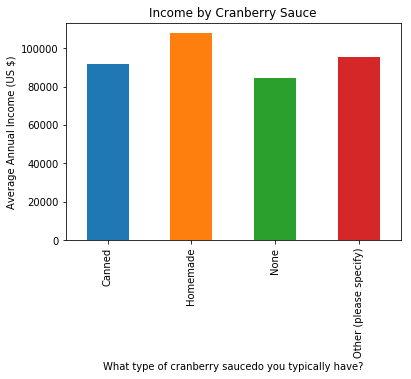

In [89]:
#Use agg to compute the mean and plot the results in a bar chart

plt.xlabel('Type of cranberry sauce served at Thanksgiving') 
plt.ylabel('Average Annual Income (US $)') 
plt.title("Income by Cranberry Sauce") 
cran_inc.plot(kind="bar")

In [86]:
#Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"

tofo_turkey = tg_income.loc[tg_income["What is typically the main dish at your Thanksgiving dinner?"]=="Tofurkey"]                         
tofo_gb = tofo_turkey.groupby(['What type of cranberry saucedo you typically have?']).Int_Income.mean()

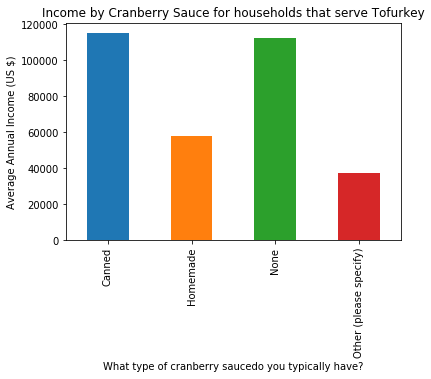

In [87]:
#Choose an appropriate plot or chart to visualize the results
plt.xlabel('Type of cranberry sauce served at Thanksgiving') 
plt.ylabel('Average Annual Income (US $)') #Y-axis label
plt.title("Income by Cranberry Sauce for households that serve Tofurkey") #Chart title
tofo_gb.plot(kind="bar")